In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("data/spotify52kData.csv")

### Q1: Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

In [4]:
print(df1['popularity'].isnull().sum(), df1['duration'].isnull().sum())
#no null values, no imputation or dropping rows needed

0 0


In [5]:
duration_vals = np.asarray(df1['duration'])
popularity_vals = np.asarray(df1['popularity'])

(array([5.1112e+04, 8.1600e+02, 4.1000e+01, 1.1000e+01, 2.0000e+00,
        6.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 6.0000e+00]),
 array([  17453. ,  494610.3,  971767.6, 1448924.9, 1926082.2, 2403239.5,
        2880396.8, 3357554.1, 3834711.4, 4311868.7, 4789026. ]),
 <BarContainer object of 10 artists>)

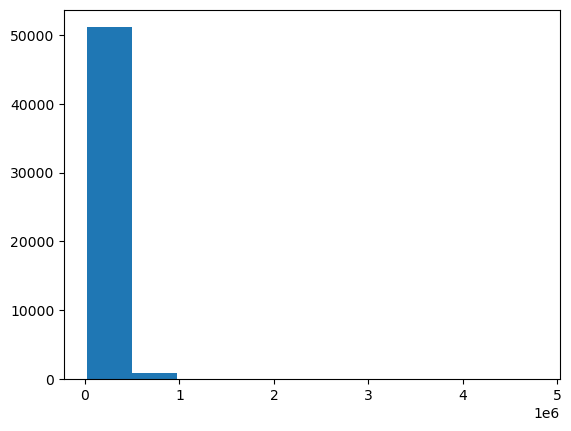

In [6]:
#very skewed data for duration
f, ax = plt.subplots()
ax.hist(duration_vals)

In [7]:
#remove outliers
selection = np.where((duration_vals<6e5))
duration_rmv = duration_vals[selection]
popularity_rmv = popularity_vals[selection]
outlier_ratio = (len(duration_vals)-len(duration_rmv))/len(duration_vals)*100
print("removing", str(round(outlier_ratio,2))+"%", "of outliers from duration column")

removing 0.71% of outliers from duration column


(array([ 1138.,  3632., 14023., 17418.,  8477.,  3589.,  1839.,   881.,
          433.,   201.]),
 array([ 17453. ,  75707.6, 133962.2, 192216.8, 250471.4, 308726. ,
        366980.6, 425235.2, 483489.8, 541744.4, 599999. ]),
 <BarContainer object of 10 artists>)

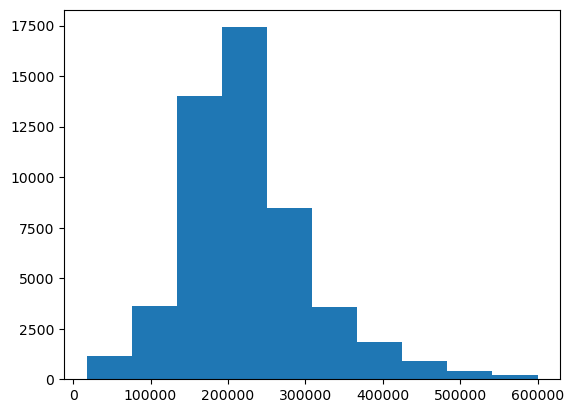

In [8]:
f, ax = plt.subplots()
ax.hist(duration_rmv)

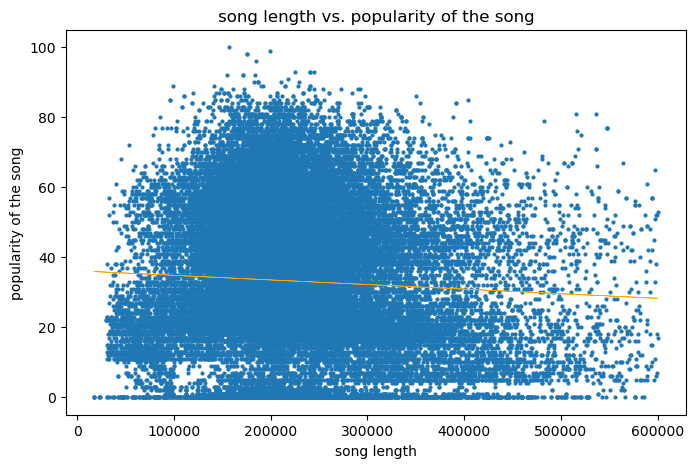

R^2: 0.003
RMSE: 4939.571


In [9]:

duration_exp = duration_rmv.reshape(-1,1)
reg1 = LinearRegression()
reg1.fit(duration_exp,popularity_rmv)
y_hat = float(reg1.coef_)*duration_rmv + reg1.intercept_
y = popularity_rmv
plt.figure(figsize=(8,5))
plt.plot(duration_rmv, popularity_rmv, 'o', ms=2)
plt.plot(duration_rmv, y_hat, color='orange', linewidth=0.5) # orange line for the fox
plt.xlabel("song length")
plt.ylabel("popularity of the song")
plt.title("song length vs. popularity of the song")
plt.show()
r2 = r2_score(y,y_hat)
print('R^2:', r2.round(3))
rmse = np.sqrt(np.mean(np.sum((y-y_hat)**2)))
print('RMSE:', rmse.round(3))

The R^2 is too low and thus we cannot conclude there is a relationship between song length and popularity of a song.

### Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo predicts popularity best? How good is this model?

In [44]:
column_list = ['duration', 'danceability', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness', 'liveness',
                'valence','tempo']
cols_dict = {}

In [57]:
def simple_linear(column_name: str):
    column = np.asarray(df1[column_name])
    popularities = df1['popularity']
    col_exp = column.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(col_exp,popularities)
    y_hat = float(reg.coef_[0])*column + reg.intercept_
    y = popularities
    r2 = r2_score(y,y_hat)
    cols_dict[column_name] = r2.round(3)

In [58]:
for i in column_list:
    simple_linear(i)

In [59]:
cols_dict

{'duration': 0.003,
 'danceability': 0.001,
 'energy': 0.003,
 'loudness': 0.004,
 'speechiness': 0.002,
 'acousticness': 0.001,
 'instrumentalness': 0.021,
 'liveness': 0.002,
 'valence': 0.001,
 'tempo': 0.0}